In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [6]:
# Set date
start_date = pd.Timestamp("2006-07-01", tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()


In [7]:
# Tickers for an all weather set and forget portfolio 
tickers = ["SPY", "TLT", "IEF", "GLD", "DJP"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [8]:
# MC Simulation 
start_date = pd.Timestamp('2006-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()

In [9]:
# 10 years of data
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


In [10]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.3, .4, .15, .075, 0.075],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [11]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head(-10)

DJP                                      \
                            open     high      low  close     volume   
time                                                                   
2018-01-11 00:00:00-05:00  24.55  24.6100  24.5000  24.51   278556.0   
2018-01-12 00:00:00-05:00  24.58  24.7200  24.5300  24.72   304649.0   
2018-01-16 00:00:00-05:00  24.55  24.6060  24.4900  24.57   443871.0   
2018-01-17 00:00:00-05:00  24.60  24.7150  24.5600  24.67   627270.0   
2018-01-18 00:00:00-05:00  24.65  24.7000  24.5450  24.64   280475.0   
...                          ...      ...      ...    ...        ...   
2021-12-10 00:00:00-05:00  27.90  27.9600  27.7900  27.92  1035421.0   
2021-12-13 00:00:00-05:00  28.03  28.0800  27.8001  27.83    87574.0   
2021-12-14 00:00:00-05:00  27.60  27.6595  27.5155  27.61   685666.0   
2021-12-15 00:00:00-05:00  27.54  27.7300  27.3500  27.71   651419.0   
2021-12-16 00:00:00-05:00  27.84  28.1221  27.8200  27.97   592798.0   

                                           GLD                            ...  \
                          daily_return    open     high     low    close  ...   
time                                                                      ...   
2018-01-11 00:00:00-05:00          NaN     NaN      NaN     NaN      NaN  ...   
2018-01-12 00:00:00-05:00     0.008568  126.01  127.130  125.81  126.975  ...   
2018-01-16 00:00:00-05:00    -0.006068  126.60  127.180  126.40  127.170  ...   
2018-01-17 00:00:00-05:00     0.004070  126.77  127.220  125.90  126.140  ...   
2018-01-18 00:00:00-05:00    -0.001216  126.13  126.520  125.80  125.850  ...   
...                                ...     ...      ...     ...      ...  ...   
2021-12-10 00:00:00-05:00     0.006852  166.72  166.915  166.18  166.590  ...   
2021-12-13 00:00:00-05:00    -0.003223  166.90  167.255  166.67  167.035  ...   
2021-12-14 00:00:00-05:00    -0.007905  165.34  166.140  165.16  165.450  ...   
2021-12-15 00:00:00-05:00     0.003622  165.29  166.400  163.80  166.150  ...   
2021-12-16 00:00:00-05:00     0.009383  167.01  168.180  166.94  168.170  ...   

                              SPY                                         TLT  \
                              low   close       volume daily_return      open   
time                                                                            
2018-01-11 00:00:00-05:00     NaN     NaN          NaN          NaN       NaN   
2018-01-12 00:00:00-05:00  276.27  277.91   53855427.0          NaN  124.1000   
2018-01-16 00:00:00-05:00  276.18  276.96   70240852.0    -0.003418  125.1700   
2018-01-17 00:00:00-05:00  277.19  279.61   62162956.0     0.009568  125.0800   
2018-01-18 00:00:00-05:00  278.58  279.18   57402163.0    -0.001538  123.9300   
...                           ...     ...          ...          ...       ...   
2021-12-10 00:00:00-05:00  466.51  470.72   64958435.0     0.009392  149.9200   
2021-12-13 00:00:00-05:00  466.27  466.61   53533452.0    -0.008731  150.4000   
2021-12-14 00:00:00-05:00  460.25  463.39   84376354.0    -0.006901  150.3500   
2021-12-15 00:00:00-05:00  460.74  470.58   97945190.0     0.015516  149.6139   
2021-12-16 00:00:00-05:00  464.80  466.43  100111230.0    -0.008819  148.7500   

                                                                               
                              high      low    close      volume daily_return  
time                                                                           
2018-01-11 00:00:00-05:00      NaN      NaN      NaN         NaN          NaN  
2018-01-12 00:00:00-05:00  124.790  123.910  124.530   7709191.0          NaN  
2018-01-16 00:00:00-05:00  125.280  124.560  125.030   7865423.0     0.004015  
2018-01-17 00:00:00-05:00  125.640  124.595  124.890   6865138.0    -0.001120  
2018-01-18 00:00:00-05:00  124.270  123.535  123.730   9307990.0    -0.009288  
...                            ...      ...      ...         ...          ...  
2021-12-10 00:00:00-05:00  150

In [72]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Luke\Desktop\Fintech\my_repos\group_project_1\my_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000083,1.000895,1.001863,0.993328,0.997054,1.004606,0.999408,0.994244,1.004538,1.003507,...,1.006198,0.999888,0.998896,1.005166,0.998381,0.998166,0.996522,1.005315,0.996948,0.998036
2,1.001230,0.995650,0.995113,0.994491,0.995510,1.005084,1.007375,0.995511,1.000988,0.997890,...,1.002813,1.001051,0.993487,1.014191,0.995629,0.990579,1.003616,1.002023,0.990343,1.002536
3,0.993959,1.001296,0.999071,0.991681,0.991786,1.002895,1.012776,1.000881,1.002473,0.999701,...,0.996171,1.014412,0.996595,1.016323,0.993966,0.991103,1.008239,1.002239,0.980410,1.005428
4,1.000931,1.000757,0.995144,0.991059,0.992270,1.003014,1.009627,1.004810,1.005771,1.006011,...,0.999437,1.006432,0.988910,1.019112,1.001513,0.978589,1.015495,1.001735,0.980113,1.004990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.998044,1.718574,1.878117,3.299703,2.099532,4.272176,1.446982,1.610032,2.076008,2.875129,...,2.022332,2.022268,1.750897,1.312859,2.633364,1.831573,2.305285,1.829801,2.740992,2.732513
2517,1.986620,1.718299,1.880791,3.282573,2.115631,4.315103,1.441327,1.610599,2.084116,2.863021,...,2.032367,2.027499,1.753659,1.313677,2.646179,1.823551,2.299270,1.835838,2.769196,2.717977
2518,1.999325,1.716177,1.862861,3.250924,2.117663,4.320368,1.438471,1.623862,2.093628,2.861361,...,2.028277,2.031257,1.747303,1.298553,2.649623,1.821645,2.309536,1.828459,2.772196,2.723305
2519,2.009222,1.715156,1.863363,3.262957,2.129538,4.301749,1.440678,1.623086,2.080646,2.870164,...,2.028489,2.023279,1.742819,1.290387,2.648375,1.831796,2.296355,1.829227,2.811096,2.713603


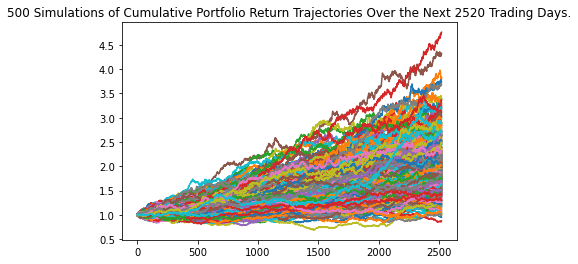

In [74]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

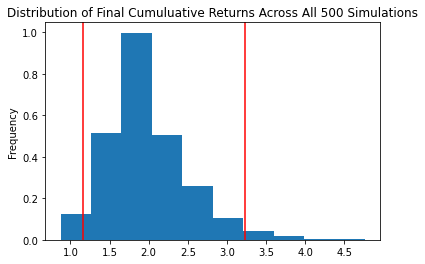

In [75]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.977195
std               0.521135
min               0.873285
25%               1.654448
50%               1.891566
75%               2.213896
max               4.760573
95% CI Lower      1.165512
95% CI Upper      3.224977
Name: 2520, dtype: float64


In [78]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $116551.18 and $322497.69
